In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

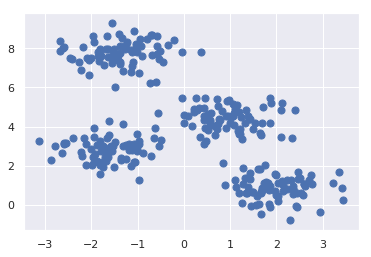

In [0]:
## k-means 알고리즘 실습을 위해 뚜렷이 구분이 되는 4개 영역을 포함하는 2차원 데이터세트를 생성한다.
## unsupervised-learning 이므로 데이터의 레이블(label)은 없다.

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [0]:
## K-means 알고리즘을 사용해서 위의 랜덤한 데이터들을 4개의 군집으로 클러스터링 한다.

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

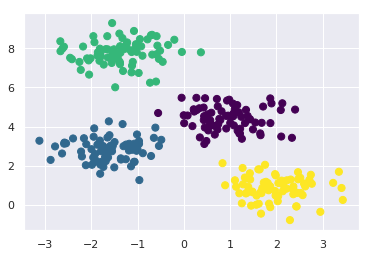

In [0]:
## K-means 알고리즘으로 위의 결과를 확인해본다.

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

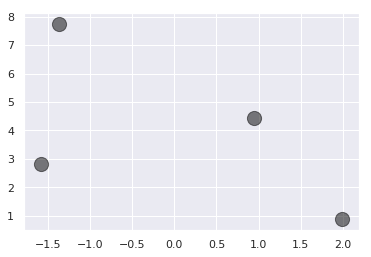

In [0]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

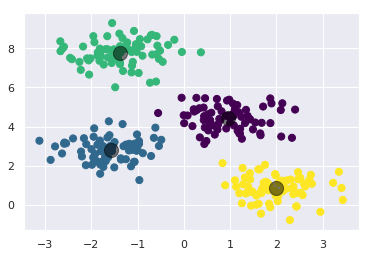

In [0]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Text(0.98, 0.98, 'Final Clustering')

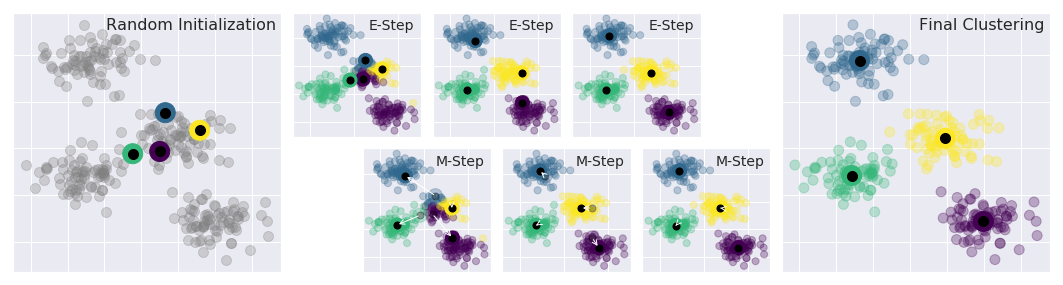

In [0]:
###### Expectation - Maximization 참고자료

from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4, n_features=2,
                       cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
         ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
        
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)

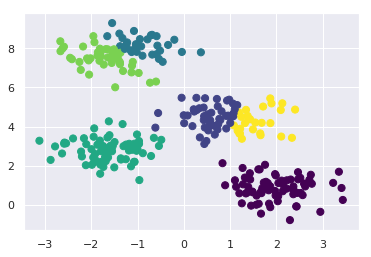

In [0]:
## 주의사항 : 군집의 개수가 사전에 정해져야 한다.

labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [0]:
### k-means는 선형 군집 경계를 가지므로 비선형 경계를 가지는 데이터에서는 취약하다.


from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

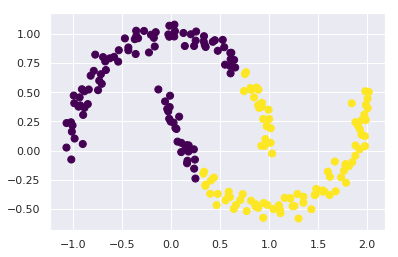

In [0]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [0]:
### IRIS 데이터를 이용해서 clustering을 해보자.

from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data = pd.concat([data,labels],axis=1)

data.head()

Sepal length  Sepal width  Petal length  Petal width  labels
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

In [0]:
## K-means 알고리즘에 사용할 feature 2개만 선택

feature = data[['Sepal length','Sepal width']]
feature.head()

Sepal length  Sepal width
0           5.1          3.5
1           4.9          3.0
2           4.7          3.2
3           4.6          3.1
4           5.0          3.6

In [0]:
## K-means 알고리즘에 학습

model = KMeans(n_clusters=3)
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [0]:
## 원본 데이터와 분류된 클러스터링 라벨과 합쳐서 결과가 어떻게 나왔는지 확인해보자.

r = pd.concat([feature, predict], axis=1)
print (r)

     Sepal length  Sepal width  predict
0             5.1          3.5        1
1             4.9          3.0        1
2             4.7          3.2        1
3             4.6          3.1        1
4             5.0          3.6        1
5             5.4          3.9        1
6             4.6          3.4        1
7             5.0          3.4        1
8             4.4          2.9        1
9             4.9          3.1        1
10            5.4          3.7        1
11            4.8          3.4        1
12            4.8          3.0        1
13            4.3          3.0        1
14            5.8          4.0        1
15            5.7          4.4        1
16            5.4          3.9        1
17            5.1          3.5        1
18            5.7          3.8        1
19            5.1          3.8        1
20            5.4          3.4        1
21            5.1          3.7        1
22            4.6          3.6        1
23            5.1          3.3        1


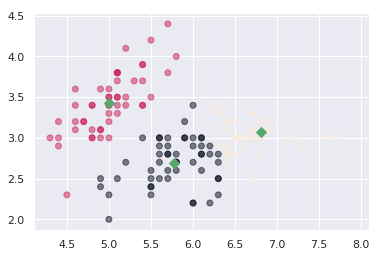

In [0]:
#### 클러스터링 결과를 시각화해서 확인해보기

centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='g')
plt.show()